# AM 205 - Assignment 3

## By Jonathan Guillotte-Blouin

In [1]:
import numpy as np
import numpy.linalg as la
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
import sys

### Question 1: Convergence rates of two integrals

#### a) Numerically evaluate $I_A$ using the composite trapezoid rule with $n$ intervals of equal size $h$, for $n = 1, 2, ..., 50$.

In [55]:
def f(x):
    return 1/(5/4 - np.cos(x))

def composite_trapezoid(a, b, n, f):
    js = np.linspace(a, b, n+1)
    h = (b - a) / n
    
    inner_sum = 0
    for j in js:
        if j == a or j == b:
            inner_sum += f(j)/2
        else:
            inner_sum += f(j)
            
    return (h, inner_sum * h)

# compute I_A and its absolute error
a_1a = 0
b_1a = np.pi/3
real_value_1a = 8*np.pi/9
I_1A_h = []
I_1A_abserr = []
for n in range(1, 51):
    h, I_A = composite_trapezoid(a_1a, b_1a, n, f)
    I_1A_h.append(h)
    I_1A_abserr.append(abs(I_A - real_value_1a))

$$f''(x) = \frac{-\cos(x)}{(\frac{5}{4} - \cos(x))^2} + \frac{2 \sin^2(x)}{(\frac{5}{4} - \cos(x))^3}$$

In the range $0 \leq x \leq \frac{\pi}{3}$, $||f||_{\infty} = 16$. Indeed, $|f''(0)| = 16$ and $f'''(0) = 0$, so the point $x = 0$ is a local maximum. The other maximum is lesser (see next figure), so we can safely say $||f||_{\infty} = 16$.

The maximum value of f'' is 16.0


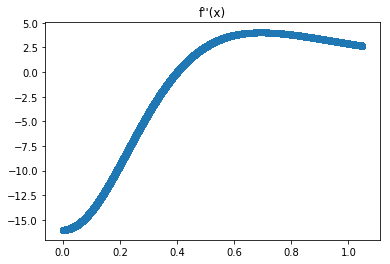

In [58]:
# f''(x)
def f2(x):
    term1 = -np.cos(x) / (5/4 - np.cos(x))**2
    term2 = 2*np.sin(x)**2 / (5/4 - np.cos(x))**3
    
    return term1 + term2

f2_domain = np.linspace(a_1a, b_1a, 100000)
plt.scatter(f2_domain, f2(f2_domain))
plt.title("f''(x)")
print("The maximum value of f'' is",  max([abs(f2(x)) for x in np.linspace(a_1a, b_1a, 100000)]))

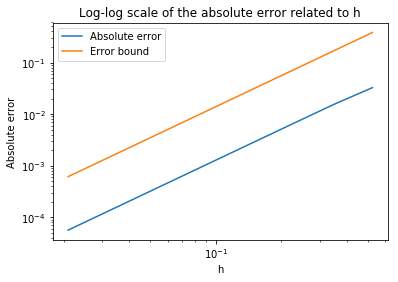

In [53]:
I_1A_errbound = [16 / 36 * np.pi * h**2 for h in I_1A_h]
plt.loglog(I_1A_h[1:], I_1A_abserr[1:], label="Absolute error") # removed the first entry, which has an error of 0
plt.loglog(I_1A_h[1:], I_1A_errbound[1:], label="Error bound") # removed the first entry, which has an error of 0
plt.title("Log-log scale of the absolute error related to h")
plt.xlabel("h")
plt.ylabel("Absolute error")
plt.legend()

We can see that the numerically computed results all have an absolute error (in blue) smaller than the error bound (in orange).